**Data Loading and Cleaning:** Load the retail sales dataset.

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('retail_sales_dataset.csv')

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
import statistics

In [ ]:
categorical_columns=[]
for column in df.columns:
    if (df[column].dtype=='object'):
        categorical_columns.append(column)
print("This is all categorical columns: ", categorical_columns)

This is all categorical columns:  ['Date', 'Customer ID', 'Gender', 'Product Category']


In [ ]:
numerical_columns=[]
for column in df.columns:
    if (df[column].dtype!='object'):
        numerical_columns.append(column)
print("This is all numerical columns: ", numerical_columns)

This is all numerical columns:  ['Transaction ID', 'Age', 'Quantity', 'Price per Unit', 'Total Amount']


**Descriptive Statistics**: Calculate basics statistics(mean,meadian,mode,standard deviation).

In [ ]:
print("Calculate basic statistics mean, median, mode, standard deviation:")
df.describe()

Calculate basic statistics mean, median, mode, standard deviation:


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


**Time Series Analysis:**Analyze sales trends over time using time series technniques.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
print("Monthly Sales: ",monthly_sales)


Monthly Sales:  Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64


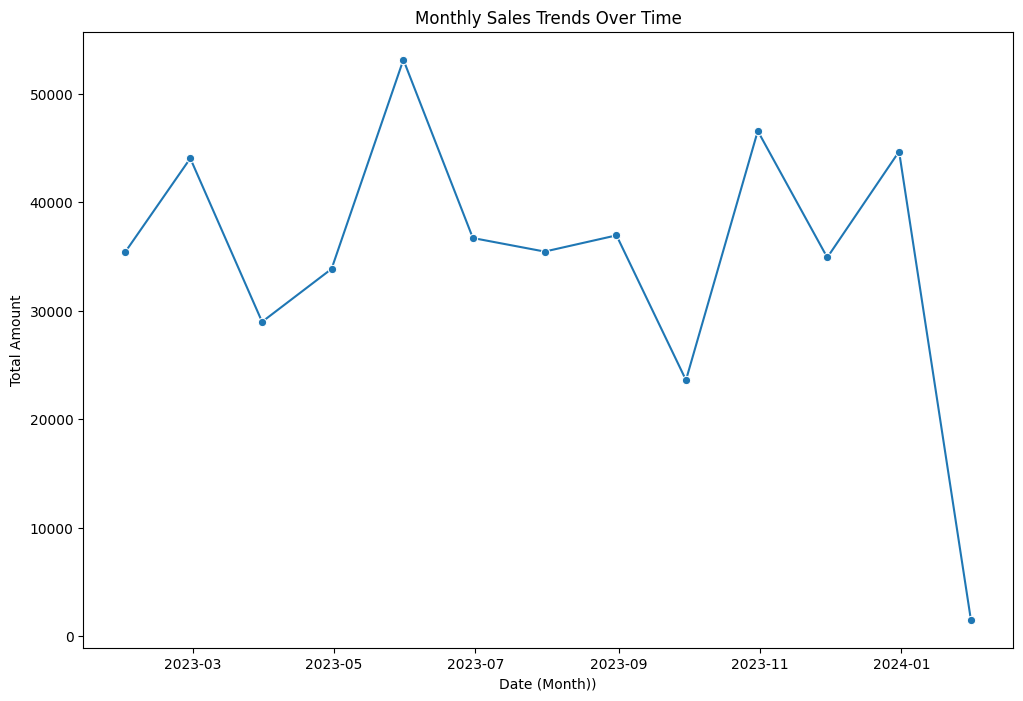

In [ ]:
#showing the Monthly Sales Trends Over Time
plt.figure(figsize=(12, 8))
ax=sns.lineplot(x=monthly_sales.index, y=monthly_sales.values,marker='o')
for p in ax.patches:
    ax.annotate(f'{(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date (Month))')
plt.ylabel('Total Amount')
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_counts1= df.groupby('Month')['Total Amount'].count()
percentage_increase1 = monthly_counts1.pct_change() * 100
overall_percentage_increase1 = (monthly_counts1.iloc[-1] - monthly_counts1.iloc[0]) / monthly_counts1.iloc[0] * 100
print("Overall percentage increase in Sales: {:.2f}%".format(overall_percentage_increase1))


Overall percentage increase in Sales: 16.67%


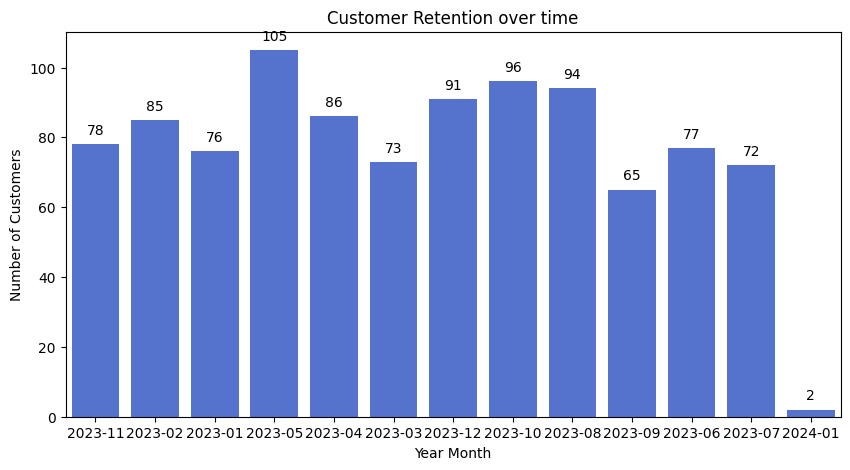

In [ ]:
#showing the customer retention over time
cust_retention=df.groupby('Customer ID')['Date'].min().reset_index()
cust_retention['Year Month'] = cust_retention['Date'].dt.to_period('M')
plt.figure(figsize=(10,5))
ax=sns.countplot(x='Year Month', data= cust_retention,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Customer Retention over time')
plt.xlabel('Year Month')
plt.ylabel('Number of Customers')
plt.show()


**Customer and Product Analysis:**Analyze customer demographics and purchasing behavior.

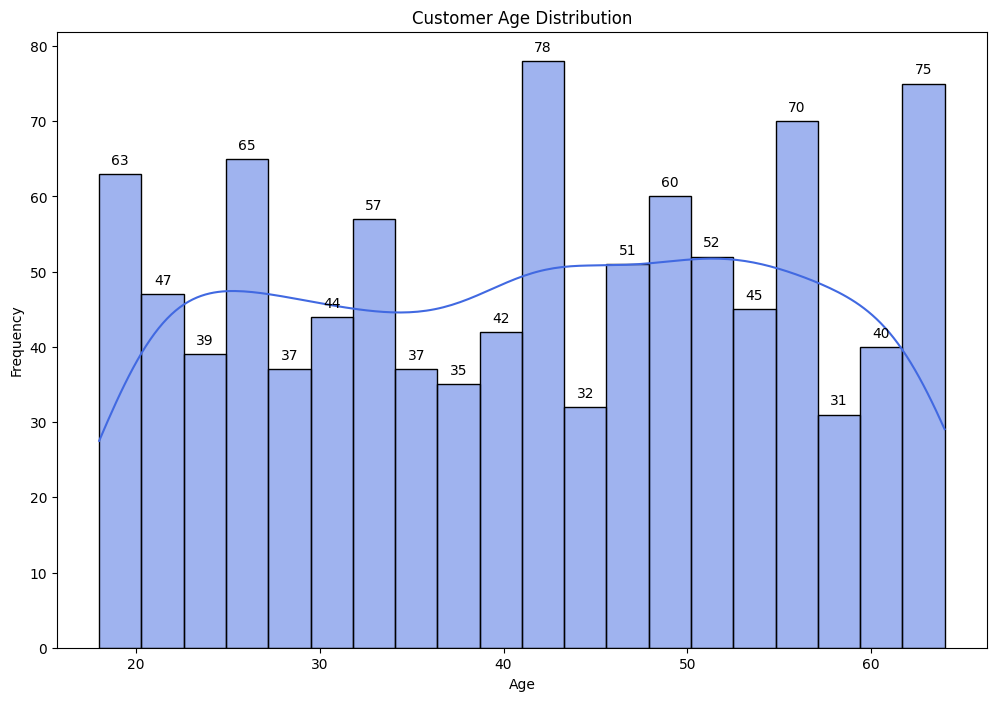

Gender Distribution:
 Gender
Female    510
Male      490
Name: count, dtype: int64


In [ ]:
# Visualizing Customer Age Distribution
plt.figure(figsize=(12,8))
ax=sns.histplot(df['Age'], bins=20, kde=True,color='royalblue')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,10), textcoords='offset points')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
gender_distribution = df['Gender'].value_counts()
print("Gender Distribution:\n", gender_distribution)


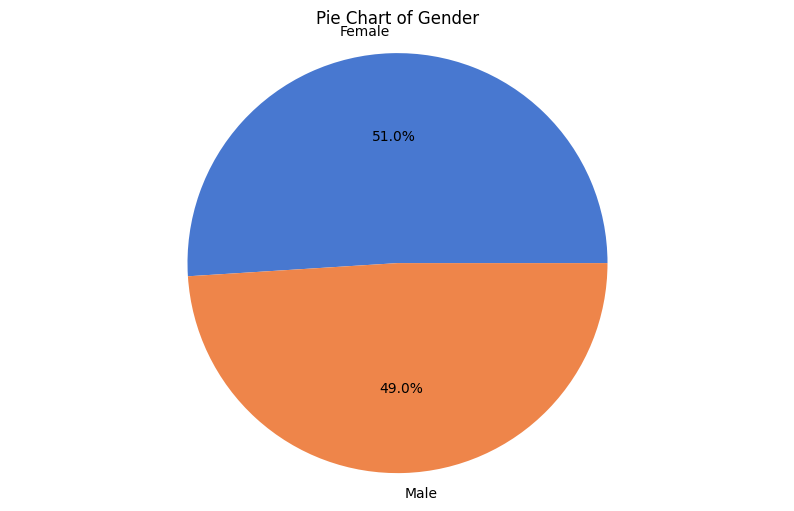

In [ ]:
## Creating a pie chart to show the distribution of Gender
col = 'Gender'
i = df[col].value_counts().index
v = df[col].value_counts().values
colors = sns.color_palette('muted')
plt.figure(figsize=(10, 6))
plt.pie(v, labels=i, autopct='%1.1f%%', colors=colors)
plt.title(f"Pie Chart of {col}")
plt.axis('equal')
plt.show()

In [ ]:
average_total_amount_by_gender = df.groupby('Gender')['Total Amount'].mean()
print("Average Total Amount by Gender:\n", average_total_amount_by_gender)


Average Total Amount by Gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


<ipython-input-39-e3405a09f91d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='Gender', y='Total Amount',data=df, palette='muted', dodge=True)


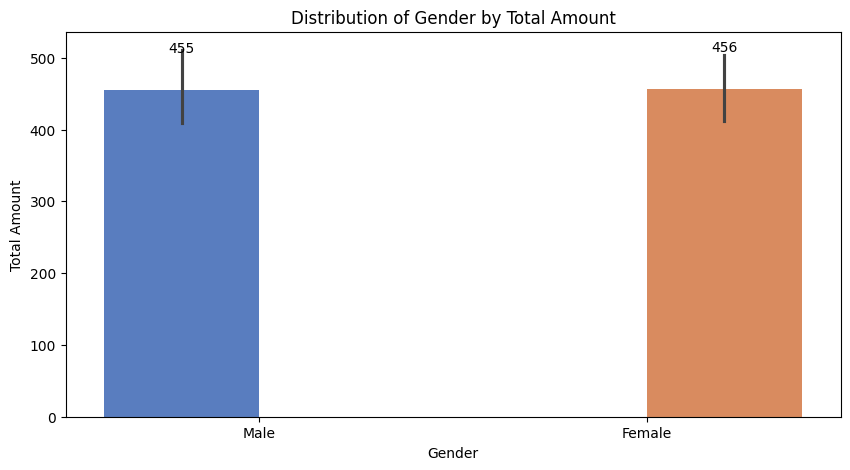

In [ ]:
#Show the bar plot Distribution of Gender by Total Amount
plt.figure(figsize=(10,5))
ax=sns.barplot(x='Gender', y='Total Amount',data=df, palette='muted', dodge=True)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,30), textcoords='offset points')
plt.title('Distribution of Gender by Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.show()

 **Purchasing Behavior:**





In [ ]:
# Product sales analysis
product_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("Product Sales:\n", product_sales)


Product Sales:
 Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [ ]:
# Average Product Category Quantity Analysis
average_Quantity = df.groupby('Product Category')['Quantity'].mean()
print("Average Product Category Quantity Analysis:\n", average_Quantity)



Average Product Category Quantity Analysis:
 Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64


In [ ]:
#Product Quantity Analysis
product_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("Product Sales quantity:\n", product_quantity)


Product Sales quantity:
 Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


**Line Plot:**

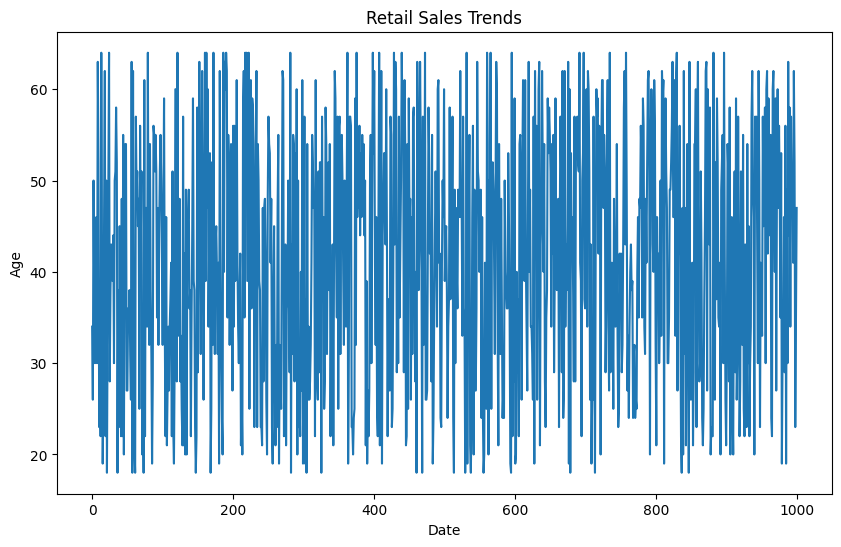

In [ ]:
import matplotlib.pyplot as plt

# Plot daily sales
plt.figure(figsize=(10, 6))
df["Age"].plot()
plt.title("Retail Sales Trends")
plt.xlabel("Date")
plt.ylabel("Age")
plt.show()


**Heatmap:**

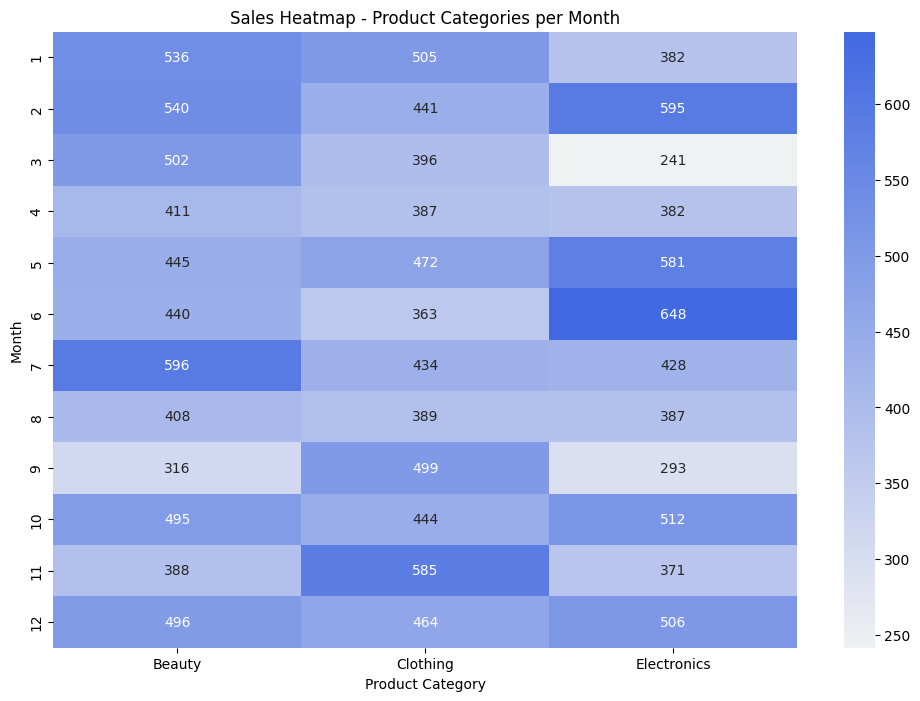

In [ ]:
#showing a heatmap to analyze sales of product categories per month
plt.figure(figsize=(12,8))
heatmap = df.pivot_table(index='Month',columns='Product Category', values='Total Amount')
custom_cmap = sns.light_palette('royalblue', as_cmap=True)
sns.heatmap(heatmap, annot=True, fmt='.0f',cmap=custom_cmap)
plt.title('Sales Heatmap - Product Categories per Month')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

**Recommendations:**

As I observed overall sales increase over time, with 16.67% representing the high selling months.
The allocate additional resources during May and October, as they show high
sales, transaction frequency, and customer retention rates. This aligns with the summer and holiday seasons, indicating increased demand.
The focus is on maintaining and potentially increasing resources for electronics and clothing categories, given their dominant contribution to overall sales. and recognize the opportunity for improvement in the Beauty category. Consider additional attention, promotions, or marketing strategies to boost sales.
Evaluate pricing and promotions for the Beauty category, considering the lower average sales compared to Electronics and Clothing. Adjust pricing or introduce targeted promotions to increase attractiveness.
Acknowledge that while Clothing has the highest quantity sold, the average sales per unit are lower than Electronics and Beauty. Consider strategies to enhance the average transaction value in the Clothing category.
Given the highest sales, focus on retaining and expanding the customer base within this age group. Introduce products or marketing campaigns that specifically appeal to this demographic.
Use sales and quantity data to optimize inventory management. Ensure that stock levels are aligned with the demand trends observed in the analysis.














